## Twitch Project off-platform (SQLite3 Matplotlib)




#### Twitch Project Part 1 : SQLite3


#### Getting Started:

* 0.Off platform start:

 First download `stream.csv` and `chat.csv`. Then open them in any text editor you like to check `headers`.

<details>
  <summary>Open/Close stream.csv with headers </summary>

`time,device_id,login,channel,country,player,game,stream_format,subscriber
2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,,
2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,false`
</details>
 
<details>
  <summary>Open/Close chat.csv without headers</summary>
    
`2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,,Dota 2
2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,,Devil May Cry 4: Special Edition`
</details>

  `.csv` files are very popular because it is a very flexible way of moving data. You can make SQLite export the result of your request into a `.csv` file then load it into another table.
  
   It could be an existing table. The data AND the headers will be added at the end of the existing TABLE. For this, better use `.csv` without headers, or you will get a funky row of wrong data (these new headers) in the middle of your table. 
   For example, add the  data from last month to your all_years_table.

   But you can load them in a new TABLE too. For this you need headers.
 So we have 2 ways to solve this problem : add headers at the top of our our `chat.csv` file in a text editor:
 
   `time,device_id,login,channel,country,player,game`
     
 Or create a new TABLE named `chat` in our database, then import our headersless `chat.csv` into it:
 
```sqlite
CREATE TABLE chat (time DATETIME,
                   device_id TEXT, 
                   login TEXT, 
                   channel TEXT, 
                   country TEXT, 
                   player TEXT, 
                   game TEXT);               
```

Now we can load our 2 files :
```sqlite
.mode csv
.import CSV/chat.csv chat
.import CSV/stream.csv stream
.mode list
```
  `.mode` is the command to change the separator. Default is `list` ie "`|`" separated. We need to switch to `csv` to load "`,`" separated files. Then we switch back to default mode. The list separator is perfect to build tables in Mardown (for Codecademy forum or Jupiter Notebook).

  Here we import the file chat.csv from the folder CSV, CSV is in our current directory.

   Important note : SQLite default setting is `.headers off` . This mean it will not display headers on your screen when you send a querry. And if you change the output to export your querry into a `.csv` file, the file will be without headers.
    You may want to change this to `.headers on`.


* 1.Start by getting a feel for the `stream` TABLE and the `chat` TABLE:
     Select all columns from the first 20 rows.

What columns do the tables have?

```sqlite
.headers on
SELECT * FROM chat LIMIT 20;
SELECT * FROM stream LIMIT 20;
```
<details>
  <summary>Open/Close first querry result </summary>

|time|device_id|login|channel|country|player|game|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|2015-01-01 18:45:50|70e2b95b5ac0d4c227e46966658d16b3e044996e|5c2f5c1f19a7738e16ed0be551d865e8a8fce71d|jerry|BY||Dota 2|
2015-01-01 01:16:57|f2b9065b55fd80d6aa653ce989b489f4ec5198be|0d77740e4fb5ce77d94f9f6c8ef1f762990d0344|elaine|HK||Devil May Cry 4: Special Edition
2015-01-01 16:22:10|d448ba963d7e1023dd1b0a40b95d4f6611750692|77ab14c1fb815e1c369ba0cf7d4c56b4fe489997|frank|GB|iphone_t|League of Legends
2015-01-01 03:58:13|8d6823dc52b400b50aebf269bf1f03a36d19eeaa|91cb88c0743761589273fc5e800e7743ece46494|frank|US|iphone_t|League of Legends
2015-01-01 11:47:35|16c1e39594d62358d27ae604ad43a071f0d86bc4|51a9234f83d656607cfd7f26690c12d2ffbce353|estelle|DE||Dota 2
2015-01-01 17:59:51|6fcc75522de37833a0fb21fba4965aad3b63ea57|f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0|jerry|RU||Dota 2
2015-01-01 02:24:33|dea94b3030025d837dd841fbfd479e775987f65d|9dbbcf6c7792074771c4c7284807041eac467ad5|elaine|TW||Gaming Talk Shows
2015-01-01 18:26:34|671bee0f3d66077876d9bc231990597292392cc2|51c286a41daa8e060275f622f2b8436bee9fab91|jerry|UA||Dota 2
2015-01-01 13:13:18|8b31d5ebd1f4f41d4365ae4a471c1686dd256745|06decad1d9565150791e183da017f47123433a4c|estelle|GB|ipad_t|Dota 2
2015-01-01 20:20:55|f2ebb129e6930e608f2ed3f5fb52bc4d533c4891|4679f8113aa157ba76fc6db5878d7ee625e88d55|frank|CA||League of Legends
2015-01-01 22:47:24|faf5c126f52f52f4b23c057c31f35fb0cdfbcdf3|cf2c292a9cc31cc398428ec82a872e620d3237df|george|||DayZ|

</details>

<details>
  <summary>Open/Close second querry result </summary>

|time|device_id|login|channel|country|player|game|stream_format|subscriber|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|2015-01-01 18:33:52|40ffc2fa6534cf760becbdbf5311e31ad069e46e|085c1eb7b587bfe654f0df7b4ba7f4fc4013636c|frank|US|iphone_t|League of Legends|||
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false
2015-01-01 04:39:38|2f9c3f9ee1033b71a3819564243f20ef3bec0183|5b9a43e68f019185f55615d0b83019dee4b5d06f|frank|US|site|League of Legends|chunked|false
2015-01-01 11:15:30|0cda8226ba2583424c80c3c1c22c1256b080ad17|02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b|estelle|CH|site|Dota 2|high|false
2015-01-01 11:28:19|e3288ca5e3153aa85e32f64cdd994b7666968dcf|b920c228acbcbebee26d9c79f6eb73b73a9480c7|morty|FR|site|Heroes of the Storm|medium|false
2015-01-01 23:27:36|343fe2bfd58595d5c18602d420ecf6f9d694d5a8|7814f661a54349ff5eee84f9d6f476918c9b7270|george|US|iphone_t|DayZ||
2015-01-01 21:09:23|80a0c7d1abb6a5a0060e18202b77bef831e08ca5|eb158cab3f606d3894a32e20bddbfd2d589095a9|frank|US|site|League of Legends|high|true
2015-01-01 19:14:27|1e342e5e4e228f617449029054b3bb19c5224528|2aaf6a414bc3dc923b04f986de7ba1b8101c6698|frank|CA|site|League of Legends|high|false
2015-01-01 13:51:04|272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e|401716920e3435b5e3eec9fc4ccd6a44c7af38f5|kramer|TR|site|Counter-Strike: Global Offensive|chunked|false
2015-01-01 22:00:14|593ed161c456eeeb9e18b8005786d42abc1a7373|ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1|frank|US|site|League of Legends|medium|false
</details>

* 2.What are the unique games in the stream table?

```sqlite
SELECT DISTINCT game 
FROM stream 
ORDER BY 1;
```
<details>
  <summary>Click to see the querry result </summary>

    game

    ARK: Survival Evolved
    Agar.io
    Batman: Arkham Knight
    Besiege
    Blackjack
    Block N Load
    Breaking Point
    Bridge Constructor Medieval
    Choice Chamber
    Cities: Skylines
    Counter-Strike: Global Offensive
    DayZ
    Depth
    Devil May Cry 4: Special Edition
    Dota 2
    Duck Game
    Fallout 3
    Gaming Talk Shows
    Grand Theft Auto V
    H1Z1
    Hearthstone: Heroes of Warcraft
    Hektor
    Heroes of the Storm
    League of Legends
    Lucius
    Mortal Kombat X
    Music
    Reign Of Kings
    Risk of Rain
    Rocket League
    Senran Kagura: Estival Versus
    SpeedRunners
    Super Mario Bros.
    Super Mario Bros. 3
    The Binding of Isaac: Rebirth
    The Elder Scrolls V: Skyrim
    The Last of Us
    The Sims 4
    The Witcher 3: Wild Hunt
    World of Tanks
    You Must Build A Boat
</details>

* 3.What are the unique channels in the stream table?

```sqlite
SELECT DISTINCT channel 
FROM stream 
ORDER BY 1;
```
<details>
  <summary>Click to expand and see the result</summary>
    
    channel
    elaine
    estelle
    frank
    george
    helen
    jerry
    kramer
    morty
    newman
    susan
</details>
    

###### Aggregate Functions:

* 4.What are the 10 most popular games in the stream table?
Create a list of games and their number of viewers using GROUP BY.

```sqlite
SELECT game, COUNT(*) AS viewers 
FROM stream 
GROUP BY game 
ORDER BY 2 DESC
LIMIT 10;
```

<details>
  <summary>Click to see the Top10</summary>

|games|viewers|
|:-:|:-:|
|League of Legends|193533|
|Dota 2|85608|
|Counter-Strike: Global Offensive|54438|
|DayZ|38004|
|Heroes of the Storm|35310|
|The Binding of Isaac: Rebirth|29467|
|Gaming Talk Shows|28115|
|World of Tanks|15932|
|Hearthstone: Heroes of Warcraft|14399|
|Agar.io|11480|

</details>

 We need this table for the second part, so we change the output in SQLite :
 ```sqlite
.headers on
.mode csv
.once CSV/topgames.csv

SELECT game AS games, COUNT(*) AS viewers 
FROM stream 
GROUP BY game 
ORDER BY 2 DESC
LIMIT 10;

.mode list
 ```
 
  `.once CSV/topgames.csv` will output the next querry into a file named topgames.csv in you CSV folder.
 We change the separator to "," here, but pandas could deal with the default "|".

* 5.These are some big numbers from the game League of Legends (also known as LoL).

Where are these LoL stream viewers located?
Create a list of countries and their number of LoL viewers using WHERE and GROUP BY.

```sqlite
SELECT country,COUNT(*) AS views
FROM stream
WHERE game='League of Legends'
GROUP BY 1
ORDER BY 2 DESC;
```

<details>
  <summary>Returns a list of 156 countries, Click to see the top 12</summary>

|country|views|
|:-:|:-:|
|US|85606|
|CA|13034|
|DE|10835|
||7641|
|GB|6964|
TR|4412
AU|3911
SE|3533
NL|3213
DK|2909
GR|2885
PL|2776

</details>

* 5.bis: for the second part, we are going to draw a pie out of these data. But we can't show 156 countries on a pie. We need to regroup smaller ones in 'other'.
 So we need to change the previous request. Put it into a WITH, then use a CASE on countries to regroup countries with less than 2800 viewers into an 'Other145' common "country group". 
 
```sqlite
WITH wwlol AS (
  SELECT country,COUNT(*) AS views
  FROM stream
  WHERE game='League of Legends'
  GROUP BY 1
  ORDER BY 2 DESC)
SELECT CASE
 WHEN wwlol.views > 2800 THEN wwlol.country
 ELSE 'Other145'
 END AS country,
       SUM(views) AS viewers
FROM wwlol
GROUP BY 1
ORDER BY 2 DESC;
```
<details>
  <summary>Click to expand and see the result</summary>
    
|country|viewers|
|:-:|:-:|
|US|85606|
Other145|48590
CA|13034
DE|10835
||7641
GB|6964
TR|4412
AU|3911
SE|3533
NL|3213
DK|2909
GR|2885
 
</details>

 As you can see it was not only a cosmetic CASE statement. In this list of 12 rows, we have 100% of our viewers and all 156 countries. In the previous one we had 12 countries only and 75% of our viewers.
  We export this result to `wwlol.csv` for later use with pandas.

* 6.The player column contains the source the user is using to view the stream (site, iphone, android, etc).
Create a list of players and their number of streamers.

```sqlite
SELECT player, COUNT(*) AS views
FROM stream
GROUP BY 1
ORDER BY 2 DESC;
```
<details>
  <summary>Click to expand and see the result</summary>

|player|views|
|:-:|:-:|
|site|246115|
iphone_t|100689
android|93508
ipad_t|53646
embed|19819
xbox_one|4863
home|3479
frontpage|1567
amazon|1155
xbox360|985
roku|233
chromecast|149
facebook|83
ouya|3
nvidia shield|3
android_pip|2
    
</details>

* 7.Create a new column named genre for each of the games.
Group the games into their genres: Multiplayer Online Battle Arena (MOBA), First Person Shooter (FPS), Survival, and Other.
Using CASE, your logic should be:

    If Dota 2, Heroes of the Strom, League of Legends → MOBA
    If Heroes of the Strom → MOBA
    If Counter-Strike: Global Offensive → FPS
    If DayZ, ARK: Survival Evolved → Survival
    Else → Other

Use GROUP BY and ORDER BY to showcase only the unique game titles.

```sqlite
SELECT DISTINCT game, 
    CASE
     WHEN (game = 'League of Legends') OR (game = 'Dota 2') OR (game = 'Heroes of the Storm') THEN 'MOBA'
     WHEN game = 'Counter-Strike: Global Offensive' THEN 'FPS'
     WHEN (game = 'DayZ') OR (game = 'ARK: Survival Evolved') THEN 'Survival'
     ELSE 'Other'
    END AS genre
FROM stream
GROUP BY 1
ORDER BY 2;
```
<details>
  <summary>Click to expand and see the result</summary>

|game|genre|
|:-:|:-:|
|Counter-Strike: Global Offensive|FPS|
Dota 2|MOBA
Heroes of the Storm|MOBA
League of Legends|MOBA
||Other
Agar.io|Other
Batman: Arkham Knight|Other
Besiege|Other
Blackjack|Other
Block N Load|Other
Breaking Point|Other
Bridge Constructor Medieval|Other
Choice Chamber|Other
Cities: Skylines|Other
Depth|Other
Devil May Cry 4: Special Edition|Other
Duck Game|Other
Fallout 3|Other
Gaming Talk Shows|Other
Grand Theft Auto V|Other
H1Z1|Other
Hearthstone: Heroes of Warcraft|Other
Hektor|Other
Lucius|Other
Mortal Kombat X|Other
Music|Other
Reign Of Kings|Other
Risk of Rain|Other
Rocket League|Other
Senran Kagura: Estival Versus|Other
SpeedRunners|Other
Super Mario Bros.|Other
Super Mario Bros. 3|Other
The Binding of Isaac: Rebirth|Other
The Elder Scrolls V: Skyrim|Other
The Last of Us|Other
The Sims 4|Other
The Witcher 3: Wild Hunt|Other
World of Tanks|Other
You Must Build A Boat|Other
ARK: Survival Evolved|Survival
DayZ|Survival

</details>

###### How does view count change in the course of a day?

* 8.Before we get started, let’s run this query and take a look at the time column from the stream table:

```sqlite
SELECT time
FROM stream
LIMIT 10;
```
<details>
  <summary>Click to expand and see the result</summary>

|time|
|:-:|
|2015-01-01 18:33:52|
2015-01-01 23:35:33
2015-01-01 04:39:38
2015-01-01 11:15:30
2015-01-01 11:28:19
2015-01-01 23:27:36
2015-01-01 21:09:23
2015-01-01 19:14:27
2015-01-01 13:51:04
2015-01-01 22:00:14
    
</details>

2015-01-01 23:35:33 format is: YYYY-MM-DD HH:MM:SS

The data type of the time column is DATETIME.It is for storing a date/time value in the database.




* 9.SQLite comes with a strftime() function - a very powerful function that allows you to return a formatted date.

It takes two arguments:

strftime(format, column)

Let’s test this function out:

```sqlite
SELECT time,
   strftime('%S', time)
FROM stream
GROUP BY 1
LIMIT 20;
```
What do you think this does?
<details>
  <summary>Click to expand and see the result</summary>

|time|strftime('%S', time)|
|:-:|:-:|
2015-01-01 00:00:00|00
2015-01-01 00:00:01|01
2015-01-01 00:00:02|02
2015-01-01 00:00:03|03
2015-01-01 00:00:04|04
2015-01-01 00:00:06|06
</details>


* 10.Okay, now we understand how strftime() works. Let’s write a query that returns three columns:

    The hours of the time column
    The view count for each hour

Lastly, filter the result with only the users in your country using a WHERE clause.

```sqlite
SELECT strftime('%H', time),
COUNT(*) AS viewers
FROM stream
WHERE country = 'FR'
GROUP BY 1;
```
<details>
  <summary>Click to expand and see the result</summary>

|strftime('%H', time)|viewers|
|:-:|:-:|
00|171
01|153
02|354
03|334
04|305
05|104
06|13
07|15
08|87
09|100
10|138
11|403
12|751
13|745
14|732
15|830
16|567
17|474
18|327
19|264
20|137
21|106
22|77
23|105

</details>

We are going to need these data from the third graph of the second part. So we export this querry as a .csv file.
We change country to 'US'. This way we match Codecademy's data and avoid time zone hazards. We save it as :
`usviewperhour.csv`

###### Joining the two tables:

* 11.The stream table and the chat table share a column: device_id.Let’s join the two tables on that column.

```sqlite
SELECT * 
FROM stream 
JOIN chat
 ON stream.device_id = chat.device_id
LIMIT 10;
```
This is a long one.  
<details>
  <summary>Click to expand and see the result</summary>
    
|time|device_id|login|channel|country|player|game|stream_format|subscriber|time|device_id|login|channel|country|player|game|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
2015-01-01 18:33:52|40ffc2fa6534cf760becbdbf5311e31ad069e46e|085c1eb7b587bfe654f0df7b4ba7f4fc4013636c|frank|US|iphone_t|League of Legends|||2015-01-01 22:43:57|40ffc2fa6534cf760becbdbf5311e31ad069e46e|085c1eb7b587bfe654f0df7b4ba7f4fc4013636c|frank|US|iphone_t|League of Legends
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 20:41:09|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 20:41:16|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 20:46:02|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 21:19:08|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 21:23:49|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 22:00:41|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 22:02:43|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 22:09:32|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ
2015-01-01 23:35:33|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US|site|DayZ|chunked|false|2015-01-01 22:09:49|9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760|5ad49a7b408ce452140b180dd6efb57a9f4d22c7|george|US||DayZ

</details>

* 12.Good job! You have completed the SQL portion of the project. Before moving on to Part 2: Visualize data with Matplotlib, see what else you can dig up!

For example:

    What are your favorite games? Can you find some insights about its viewers and chat room users?
    Is there anything you can do after joining the two tables?

With this new table with can connect chat room uses to each viewer.
At least viewers who chat.

 If we use a LEFT JOIN instead of a INNER JOIN, we will have a table with all chat for each viewer, including viewers with a null number of chats.
 
 Now we can count the number of chat for each viewer (we GROUP BY stream.time and COUNT chat.time):

```sqlite
SELECT stream.*, COUNT(chat.time) AS chats 
FROM stream 
LEFT JOIN chat 
ON stream.device_id = chat.device_id 
GROUP BY 1;
```
  
<details>
  <summary>Click for result with LIMIT 10:</summary>

|time|device_id|login|channel|country|player|game|stream_format|subscriber|chats|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
2015-01-01 00:00:00|cb5fe37a2eb51f7aed81b34b1604fbd4bfb71217|7967fdbd2895d5c05a6cbb30258e989fbe8a327c|frank|AU|site|League of Legends|high|false|0
2015-01-01 00:00:01|90095589905557f98da176a66ef231fa4324954e|3efa7f1222cdee000fe793f7fcea24c94fee97e0|kramer|US|iphone_t|Counter-Strike: Global Offensive|||0
2015-01-01 00:00:02|5f522fc288646d5c0cc051bd45e8fc0d99aad2ea|59e9ebaf322ef325a39a73f4cc77b55e524b288a|frank|US|site|League of Legends|high|false|0
2015-01-01 00:00:03|e35bf31a9964591e56327c327ba8d4e724d3a57f|62134a79a6cd798602c31b353e2ca6d30d2c648e|frank|CA|android|League of Legends|||0
2015-01-01 00:00:04|4bd271385ccb35348538b3854568195f6687f85a|f44af92a2859ce7c5e67f238c2ce9438f68f140a|frank|LT|iphone_t|League of Legends|||0
2015-01-01 00:00:06|01adbe547371396ae77fe910572fe9f3644b1597|534bd1584a8d519046fa30601b83b4939262a16f|frank|US|site|League of Legends|high|false|1
2015-01-01 00:00:07|1ff859037fe005d687b9eddb071efa710447b8bd|010396e909c3b7c68d8017795a1126ed5b0baa4a|frank|US|iphone_t|League of Legends|||14
2015-01-01 00:00:08|e27a9d346763aa921ca7e5e05b27c82bb451f441|93faeee63806ec4dfbfd5eb3b2c981b27691be33|frank|US|iphone_t|League of Legends|||1
2015-01-01 00:00:09|cbf30e024b1ea9da75634ac5ab06083c06089638|83183621056469aef798fa6e2f55b82773f0a762|frank|SG|site|League of Legends|medium|false|0
2015-01-01 00:00:10|43e7b504851b8512a08705b8c25f8df35e933cde|9fdbeb56d9372bb1dbd3163b2f5e0ccbbc1cc962|frank|AR|site|League of Legends|medium|false|0
    
</details>

 It is now easy to calculate average chat activity per viewer, by country, overall, by game or by channel, and then predict for example the expected traffic in a Danish speaking chatroom for DayZ even if there is no Danish speaking chatroom we could study, out of our Danish DayZ viewers number and average chat per viewer.


#### Twitch Part 2: Visualize Data with Matplotlib

We worked with the 800k rows database, Codecademy in platform works with only a 3k rows part. This is why we have 200 times more viewers and a different order in our Top 10 games. 
 For each 3 graphs you we see 2 code cells:
 
 In the first cell we import our csv file with pandas and unpack the data into variables compatibles with in-platform project.
 You will find as comment the lists of data from this in-platform project. So you can quote our variables and unquote Codecademy's to visualize in-platform results.
 
 The second cell is "matplotlib only" and should work in-platform too.
 
 But first we need to import pandas and pyplot.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

###### Bar Graph: Featured Games

* 1.Twitch’s home page has a Featured Games section where it lists the “Games people are watching now”.

In the previous part of the project, you used SQL to find the top 10 trending games (on January 1st, 2015) and their number of viewers. 
 Now we want to import this file (`topgames.csv`) we created on step 4. We use pandas for this.

In [3]:
#(Our data)
topgames = pd.read_csv('topgames.csv')

#games = topgames.games
viewers = topgames.viewers
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "WoT", "Hearth", "Agar.io"]

#(Data from Codecademy)
#games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]
#viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]


As you can see we cheat. Our graph would be ugly with full game names. So we use a hand created list of shortened names. It is similar to Codecademy list, but rank 8 and 9 are switched. We have the same games in our Top 10 but not in the same order.

* 2.Now, use the plt.bar() to plot a bar graph using range(len(games)) and viewers as arguments.
Feel free to pick a color, too (using color='_' or a list).

* 3.Make the graph more informative by doing the following:

    Add a title
    Add a legend
    Add axis labels
    Add ticks
    Add tick labels (rotate if necessary)

Then, use plt.show() to visualize it.


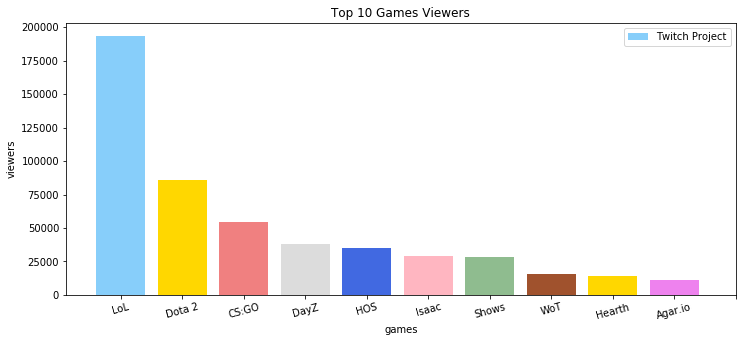

In [4]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro',
          'royalblue', 'lightpink', 'darkseagreen', 'sienna',
          'gold', 'violet']

plt.figure('Twitch_BarGraph', figsize=(12,5))
ax1 = plt.subplot()
plt.bar(range(len(games)), viewers, color = colors)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_xticklabels(games, rotation = 15)
plt.title('Top 10 Games Viewers')
plt.xlabel('games')
plt.ylabel('viewers')
plt.legend(['Twitch Project'])
plt.show()

######  Pie Chart: League of Legends Viewers' Whereabouts

* 5.There are 1070 League of Legends viewers from this dataset. Where are they coming from?
  First we need to import our csv file.


In [5]:
wwlol = pd.read_csv('wwlol.csv')

labels = wwlol.country
countries = wwlol.viewers

#(Data from Codecademy)
#labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]
#countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

Because there are 12 countries (including "nan" or "N/A" and Others), let’s create an array called colors and add 12 color codes to it, like so:

`colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']`

* 6.7.8 Use plt.pie() to plot a pie chart.Inside :
    
    Throw in the countries variable and the colors = colors.
    Add percentages, configure the percentages’ placement    
    Turn the pie 345 degrees,  Add shadow
    Then “explode”, or break out, the 1st slice (United States):

`explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)`

Add a title and a legend.

Lastly, use plt.show() to visualize it.


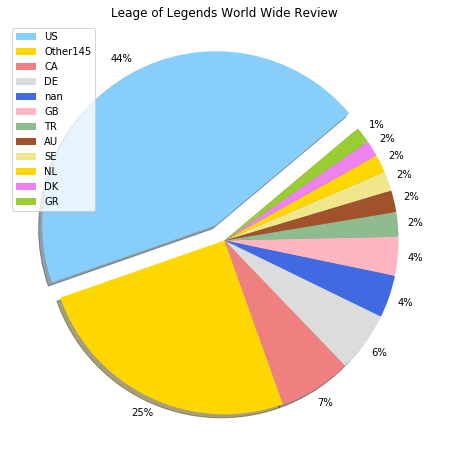

In [6]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro',
          'royalblue', 'lightpink', 'darkseagreen', 'sienna',
          'khaki', 'gold', 'violet', 'yellowgreen']
plt.figure('Twitch_PieChart', figsize=(15,8))
plt.pie(countries, colors=colors, autopct='%1.0f%%', pctdistance=1.1,
        explode = explode, shadow = True, startangle=40)
plt.title('Leage of Legends World Wide Review')
plt.legend(labels, loc=2)
plt.show()

###### Line Graph

* 9.We were able to find the number of US viewers at different hours of the day on January 1st, 2015.
Let’s make this into a line graph.

 But first import our `usviewperhour.csv` file with pandas.

In [7]:
hour = range(24)
#(Our data)
vph = pd.read_csv('usviewperhour.csv')
viewers_hour = vph.viewers

#(Data from Codecademy)
#viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

* 10.Use plt.plot() to plot a line graph.
    
    Don’t forget to throw in hour and viewers_hour.
    Then, add the title, the axis labels, legend, and ticks.

* 11.There is some uncertainty in these numbers because some people leave their browsers open. Let’s account for a 15% error in the viewers_hour data.

    First, create a list containing the upper bound of the viewers_hour and call it y_upper.
    Then, create a list containing the lower bound of the viewers_hour and call it y_lower.
    Use plt.fill_between() to shade the error, with an alpha of 0.2.
    Lastly, use plt.show() to visualize.

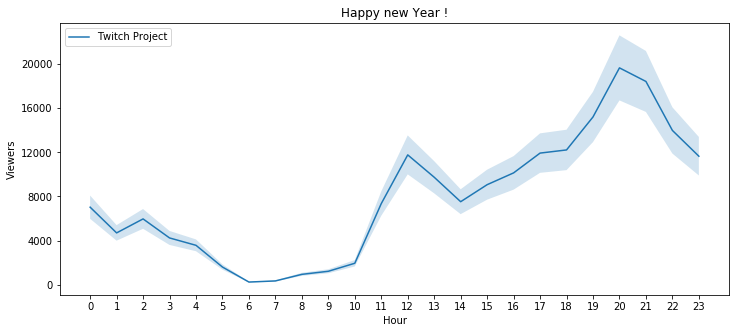

In [8]:
plt.figure('Twitch_BarGraph', figsize=(12,5))
# Answer 10
ax2 = plt.subplot()
plt.plot(range(24), viewers_hour)
plt.title('Happy new Year !')
plt.xlabel('Hour')
plt.ylabel('Viewers')
ax2.set_xticks(hour)
ax2.set_yticks([0, 4000, 8000, 12000, 16000, 20000])
plt.legend(['Twitch Project'], loc=2)

# Answer 11
y_upper = [1.15*view for view in viewers_hour]
y_lower = [0.85*view for view in viewers_hour]
plt.fill_between(hour, y_lower, y_upper, alpha=0.2)

plt.show()


## Twitch Project off-platform (Content)


#### Twitch Project Part 1 : SQLite3

#### Getting Started:

###### Aggregate Functions:

    SQL request for Bar Graph in .4
    SQL request for Pie chat in .5bis

###### How does view count change in the course of a day?

    SQL request for Line Graph in .10
    
###### Joining the two tables:

#### Twitch Part 2: Visualize Data with Matplotlib

###### Bar Graph: Featured Games

######  Pie Chart: League of Legends Viewers' Whereabouts

###### Line Graph